In [1]:
#Import necessary libraries and data

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [3]:
#Data plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
#loading the dataset
hatespeech_data = pd.read_csv('C:/Users/b-bal/Downloads/archive (3)/hatespeech_dataset.csv')

In [5]:
hatespeech_data.sample(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24524,25031,3,0,3,0,1,the sassy clerk at the post office was curious...
20351,20797,6,0,6,0,1,RT @xBrandi_: Only real bitches suck dick
91,92,6,1,5,0,1,"""@CHlLDHOODRUINER: when ur teacher tells u tha..."
12799,13116,3,0,3,0,1,Me &amp; my next bitch gone turn up on the fas...
843,861,6,0,6,0,1,#klokus this bitch has his nose pierced &#1285...
562,571,3,0,0,3,2,"""The water isn't yellow, I'm a healthy student"""
3454,3545,3,0,3,0,1,@IIJERiiCHOII Nah but I was worth that 52 char...
6012,6183,3,2,1,0,0,@georgiathenewsa @Rosaalbae your tits may be b...
24245,24749,3,0,3,0,1,"n I cant even enjoy the reg House Hunters, whi..."
24287,24791,3,1,2,0,1,"nobody bout their actions, you all pussy"


In [6]:
#Dataset Length
print('Dataset Length:', len(hatespeech_data), 'tweets')

Dataset Length: 24783 tweets


In [7]:
hatespeech_data.nunique() #unique value total for each column

Unnamed: 0            24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [8]:
hatespeech_data.isnull().sum() #Missing values in the dataset

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [9]:
hatespeech_data = hatespeech_data.rename(columns={'Unnamed: 0': 'index'})

In [10]:
#class column 0 - hate speech 1 - offensive language 2 - neither

In [11]:
hatespeech_data.iloc[89]['tweet'] #hate 

'"@CB_Baby24: @white_thunduh alsarabsss" hes a beaner smh you can tell hes a mexican'

In [12]:
hatespeech_data[hatespeech_data.columns[2:]].iloc[89]

hate_speech                                                           3
offensive_language                                                    0
neither                                                               0
class                                                                 0
tweet                 "@CB_Baby24: @white_thunduh alsarabsss" hes a ...
Name: 89, dtype: object

In [13]:
hatespeech_data.iloc[17]['tweet'] #offensive

'" bitch who do you love "'

In [14]:
hatespeech_data[hatespeech_data.columns[2:]].iloc[17]

hate_speech                                   1
offensive_language                            2
neither                                       0
class                                         1
tweet                 " bitch who do you love "
Name: 17, dtype: object

In [15]:
hatespeech_data.iloc[10587]['tweet'] #neither

'I just might get to these riches I might go broke on these bitches'

In [16]:
hatespeech_data[hatespeech_data.columns[2:]].iloc[10587]

hate_speech                                                           0
offensive_language                                                    3
neither                                                               0
class                                                                 1
tweet                 I just might get to these riches I might go br...
Name: 10587, dtype: object

In [17]:
hatespeech_data.head(5)

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


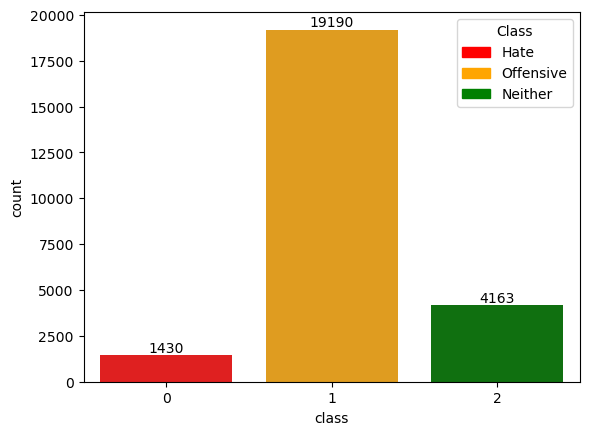

In [18]:
colors_map = {0: 'red', 1: 'orange', 2: 'green'}

count_plot = sns.countplot(x='class', data= hatespeech_data, palette = colors_map)

#class_labels = ['Hate', 'Offensive', 'Neither']

# Create the legend
class_label = ['Hate', 'Offensive', 'Neither']
class_col = ['red', 'orange', 'green']

legend_reqs = [plt.Rectangle((0,0),1,1, color=color) for color in class_col]
plt.legend(legend_reqs, class_label, title='Class')


for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

In [19]:
#Wordclouds

In [20]:
hate_words = ' '.join(hatespeech_data[hatespeech_data['class'] == 0]['tweet']) #hatespeech

In [21]:
def create_wordcloud(hate_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Reds_r').generate(hate_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud for Common Words in Hate Labeled Tweets')
    plt.show()

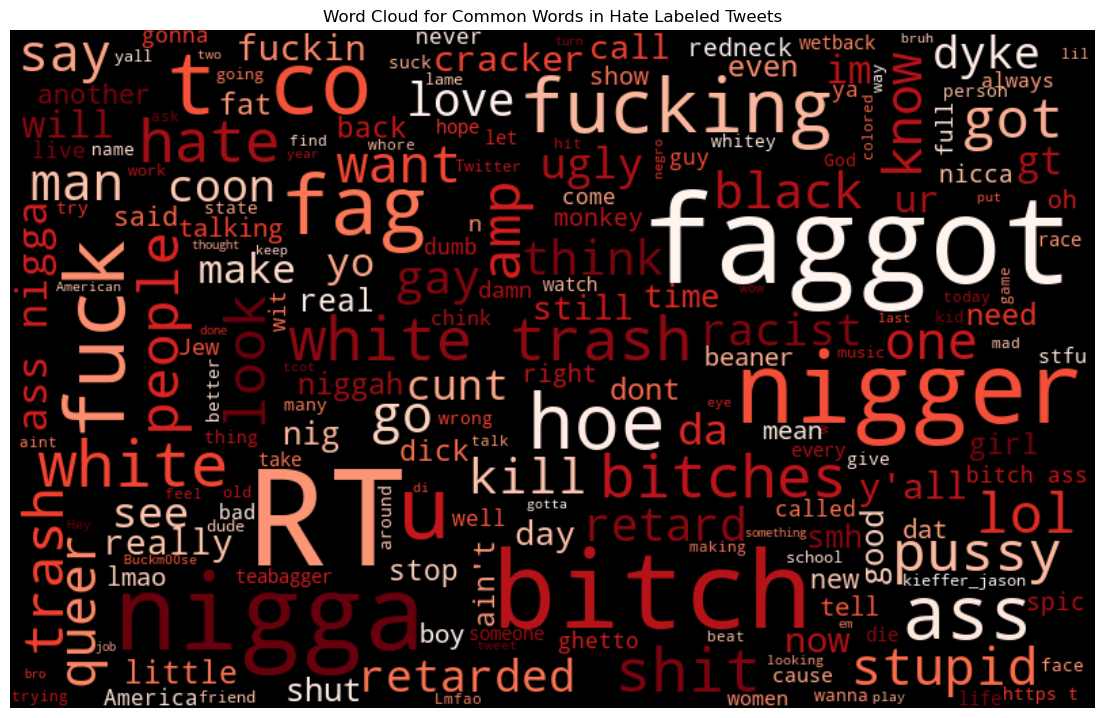

In [22]:
create_wordcloud(hate_words)

In [23]:
offensive_words = ' '.join(hatespeech_data[hatespeech_data['class'] == 1]['tweet']) #offensive

In [24]:
def create_wordcloud(offensive_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='YlOrBr').generate(offensive_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud for Common Words in Offensive Labeled Tweets')
    plt.show()

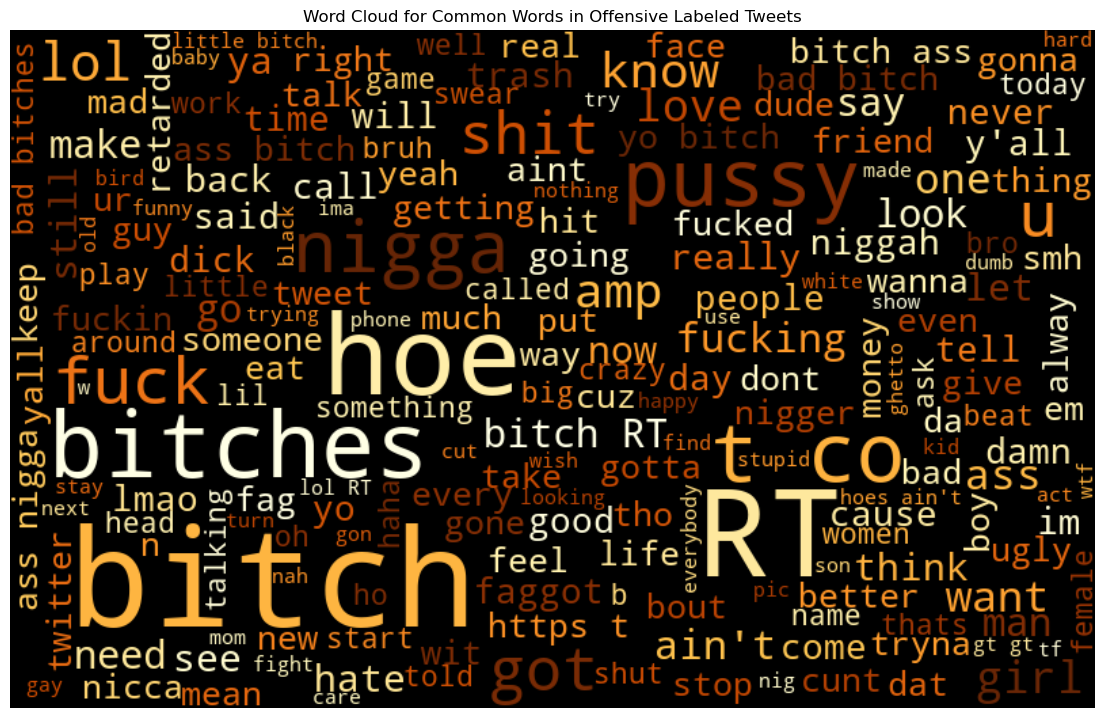

In [25]:
create_wordcloud(offensive_words)

In [26]:
neither_words = ' '.join(hatespeech_data[hatespeech_data['class'] == 2]['tweet']) #neither

In [27]:
def create_wordcloud(neither_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Greens').generate(neither_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud for Common Words in Neither Labeled Tweets')
    plt.show()

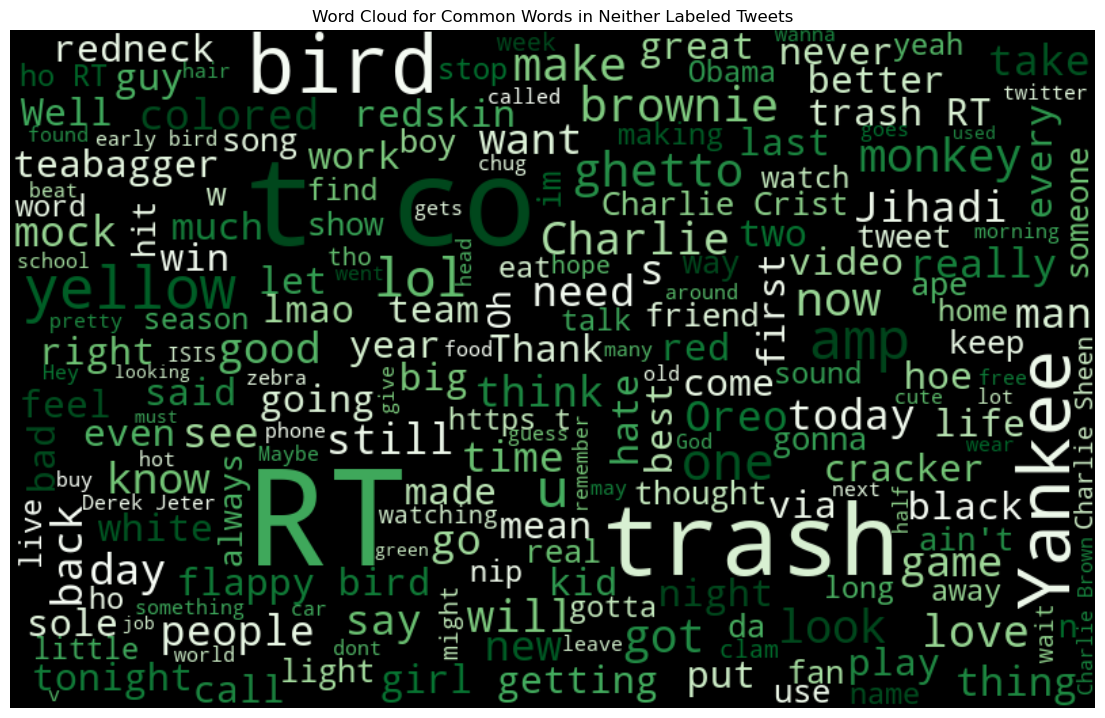

In [28]:
create_wordcloud(neither_words)

In [29]:
#Data Preprocessing

In [30]:
show_tweets = hatespeech_data[["tweet"]]
show_tweets.head(10)

,tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,""" &amp; you might not get ya bitch back &amp; ..."
9,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [31]:
import re
import gc

In [32]:
def remove_usernames(tweet):
    pattern = r'@[A-Za-z0-9_]+' # regular expression pattern where match Twitter usernames
    cleaned_text = re.sub(pattern, '', tweet) # Replace removed usernames with empty string
    return cleaned_text

hatespeech_data['tweet'] = hatespeech_data['tweet'].apply(remove_usernames)
hatespeech_data['tweet'].head(5)

0    !!! RT : As a woman you shouldn't complain abo...
1    !!!!! RT : boy dats cold...tyga dwn bad for cu...
2    !!!!!!! RT  Dawg!!!! RT : You ever fuck a bitc...
3               !!!!!!!!! RT :  she look like a tranny
4    !!!!!!!!!!!!! RT : The shit you hear about me ...
Name: tweet, dtype: object

In [33]:
#Removing Url as it adds no meaning to sentenve

url_seq = r'((www.[^s]+)|(https?://[^s]+))'

def remove_urls(tweet):
    return re.sub(url_seq,' ',tweet)
hatespeech_data['tweet'] = hatespeech_data['tweet'].apply(lambda x: remove_urls(x))
hatespeech_data['tweet'].head(5) #Check usernames

0    !!! RT : As a woman you shouldn't complain abo...
1    !!!!! RT : boy dats cold...tyga dwn bad for cu...
2    !!!!!!! RT  Dawg!!!! RT : You ever fuck a bitc...
3               !!!!!!!!! RT :  she look like a tranny
4    !!!!!!!!!!!!! RT : The shit you hear about me ...
Name: tweet, dtype: object

In [34]:
import string

def remove_punct(text):
    translate = str.maketrans('', '', string.punctuation)# translation table with punctuation characters replaced by empty string
    return text.translate(translate)  # Remove punctuation using translate

# Assuming 'tweets' is the column containing tweets in your DataFrame
hatespeech_data['tweet'] = hatespeech_data['tweet'].apply(remove_punct)
hatespeech_data['tweet'].head(5) #check exclamation

0     RT  As a woman you shouldnt complain about cl...
1     RT  boy dats coldtyga dwn bad for cuffin dat ...
2     RT  Dawg RT  You ever fuck a bitch and she st...
3                          RT   she look like a tranny
4     RT  The shit you hear about me might be true ...
Name: tweet, dtype: object

In [35]:
def remove_num(tweet):
    return re.sub(r'\d+', '', tweet)

hatespeech_data['tweet'] = hatespeech_data['tweet'].apply(remove_num)
hatespeech_data['tweet'].head(5) #check if numbers have been removed

0     RT  As a woman you shouldnt complain about cl...
1     RT  boy dats coldtyga dwn bad for cuffin dat ...
2     RT  Dawg RT  You ever fuck a bitch and she st...
3                          RT   she look like a tranny
4     RT  The shit you hear about me might be true ...
Name: tweet, dtype: object

In [36]:
#hatespeech_data = hatespeech_data[~hatespeech_data.tweet.str.contains('RT')] #remove RT
#hatespeech_data['tweet'].head() #check if RT has been removed
# won't use, removes too many rows from the dataset

In [37]:
hs_datacleaned = pd.DataFrame(hatespeech_data[['index','class', 'tweet']])

In [38]:
hs_datacleaned.head(10)

,index,class,tweet
0,0,2,RT As a woman you shouldnt complain about cl...
1,1,1,RT boy dats coldtyga dwn bad for cuffin dat ...
2,2,1,RT Dawg RT You ever fuck a bitch and she st...
3,3,1,RT she look like a tranny
4,4,1,RT The shit you hear about me might be true ...
5,5,1,The shit just blows meclaim you so faithful a...
6,6,1,I can not just sit up and HATE on another bit...
7,7,1,cause Im tired of you big bitches coming for ...
8,8,1,amp you might not get ya bitch back amp thats...
9,9,1,hobbies include fighting Mariam\n\nbitch


In [39]:
def mapclass_to_description(class_num):
    if class_num == 0:
        return 'hate'
    elif class_num == 1:
        return 'offensive'
    elif class_num == 2:
        return 'neither'
    else:
        return 'unknown' #if other cases, but shouldn't be other cases

# Apply the function to create a new column 'category'
hs_datacleaned['description'] = hs_datacleaned['class'].apply(mapclass_to_description)

In [40]:
hs_datacleaned.head(10)

,index,class,tweet,description
0,0,2,RT As a woman you shouldnt complain about cl...,neither
1,1,1,RT boy dats coldtyga dwn bad for cuffin dat ...,offensive
2,2,1,RT Dawg RT You ever fuck a bitch and she st...,offensive
3,3,1,RT she look like a tranny,offensive
4,4,1,RT The shit you hear about me might be true ...,offensive
5,5,1,The shit just blows meclaim you so faithful a...,offensive
6,6,1,I can not just sit up and HATE on another bit...,offensive
7,7,1,cause Im tired of you big bitches coming for ...,offensive
8,8,1,amp you might not get ya bitch back amp thats...,offensive
9,9,1,hobbies include fighting Mariam\n\nbitch,offensive


In [41]:
x = hs_datacleaned['tweet'].values #store our tweet values
y = hs_datacleaned['class'].values #store our class values

In [42]:
#Tokenization and Model Preperation

In [43]:
!pip install torch torchvision torchaudio

In [44]:
#!pip install transformers already installed

In [45]:
!pip install --upgrade transformers 

In [46]:
pip show transformers #shows transformers version

Name: transformers
Version: 4.40.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\Users\b-bal\anaconda3\Lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: sentence-transformers
---
Name: transformers
Version: 4.40.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: C:\Users\b-bal

In [47]:
#Tokenization and

In [48]:
import torch
from transformers import BertTokenizer, BertModel, AutoModel

In [49]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [50]:
hs_datacleaned.iloc[7809]['tweet'] #hatespeech

'Arent these little border jumpers supposed to be in school'

In [51]:
example_inputs = tokenizer('Arent these little border jumpers supposed to be in school')
example_inputs

{'input_ids': [101, 4995, 2102, 2122, 2210, 3675, 21097, 2015, 4011, 2000, 2022, 1999, 2082, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [52]:
#101 represents cls token, 102 represents the SEP, the words in between have been 
#assigned with a token

#we will add  padding tokens to make all the lists the same length
# Will also need to add truncate =True which will truncate any text that has more than 512 words
#The Maximum context size for BERT model

#return_tensors ='tf' will return tensorflow array instead of python list

In [53]:
tweets = hs_datacleaned['tweet'].values
labels = hs_datacleaned['class'].values

In [54]:
max_length = max(hs_datacleaned['tweet'].apply(len))
print(max_length)

142


In [55]:
min_length = min(hs_datacleaned['tweet'].apply(len))
print(min_length)

1


In [56]:
from statistics import mean

filter_tweets = filter(lambda x: 1 < len(x) < 150, tweets) #filter between tweets of length 100 - 150 

token_len = [len(tokenizer.encode(tweet)) for tweet in filter_tweets] # encode filtered tweets and calculate token length

# Calculate average and maximum token length
avg_token_length = mean(token_len)
max_token_length = max(token_len)

# Print results
print('Avg token length:', avg_token_length)
print('Max token length:', max_token_length)

Avg token length: 17.468947984342844
Max token length: 55


In [57]:
from statistics import mean

filter_tweets = filter(lambda x: 1 < len(x) < 100, tweets) #filter between tweets of length 100 - 150 

token_len = [len(tokenizer.encode(tweet)) for tweet in filter_tweets] # encode filtered tweets and calculate token length

#average and max token length
avg_token_length = mean(token_len)
max_token_length = max(token_len)

# Print results
print('Avg token length:', avg_token_length)
print('Max token length:', max_token_length)

Avg token length: 14.709610937971247
Max token length: 38


In [58]:
#Import libraries for test_trainsplit

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
tweets_train, tweets_testval, labels_train, labels_testval = train_test_split(
    tweets, labels, test_size=0.2, random_state=1015)  #train-test split


tweets_test, tweets_val, labels_test, labels_val = train_test_split(
    tweets_testval, labels_testval, test_size=0.5, random_state=1015) #test-validation split

# Print the sizes of each tweets set
print("Train set size:", len(tweets_train))
print("Test set size:", len(tweets_test))
print("Validation set size:", len(tweets_val))

Train set size: 19826
Test set size: 2478
Validation set size: 2479


In [61]:
print("Train set size:", len(labels_train))
print("Test set size:", len(labels_test))
print("Validation set size:", len(labels_val))

Train set size: 19826
Test set size: 2478
Validation set size: 2479


In [62]:
max_len = 150  # set max length

#Apply tokenization and padding
def bert_encode(tweets, max_len):
    encode_comp = tokenizer.batch_encode_plus(tweets,
                                          add_special_tokens=True,
                                          max_length= max_len,
                                          padding = 'max_length',
                                          truncation=True,
                                          return_attention_mask=True)
    
   
    input_ids = np.array(encode_comp['input_ids'])
    attention_masks = np.array(encode_comp['attention_mask'])  # Extract input_ids and attention_masks from the encoded dict
    
    return input_ids, attention_masks

#Ex
encode_comp_input_ids, encode_comp_attention_masks = bert_encode(tweets, max_len)

In [63]:
print("Encoded Input IDs:")
print(encode_comp_input_ids)

print("\nEncoded Attention Masks:")
print(encode_comp_attention_masks)

Encoded Input IDs:
[[  101 19387  2004 ...     0     0     0]
 [  101 19387  2879 ...     0     0     0]
 [  101 19387  4830 ...     0     0     0]
 ...
 [  101  2402 10131 ...     0     0     0]
 [  101  2017  2226 ...     0     0     0]
 [  101 21766 28579 ...     0     0     0]]

Encoded Attention Masks:
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [64]:
#test tokenization with random sentence from dataset
print('Text: ', tweets[98])
print('Token identification:', encode_comp_input_ids[98]) 
#padding shows up to Max length # this is where we get the extra zeros

Text:   If Richnow doesnt show up with hella tinder hoes Im not his friend anymore chill I brought like like  prople
Token identification: [  101  2065  4138 19779  2987  2102  2265  2039  2007  3109  2050  9543
  4063  7570  2229 10047  2025  2010  2767  4902 10720  1045  2716  2066
  2066 17678  2571   102     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0    

In [65]:
print('Max tweet length: ', max([len(sen) for sen in encode_comp_input_ids]))

Max tweet length:  150


In [66]:
MAX_LEN = 150

train_input, train_mask = bert_encode(tweets_train, MAX_LEN)

val_input, val_mask = bert_encode(tweets_val, MAX_LEN)

In [67]:
#convert arrays to tensors

In [68]:
#imported torch earlier

train_input = torch.tensor(train_input)
train_labels = torch.tensor(labels_train)
train_mask = torch.tensor(train_mask)

val_inputs = torch.tensor(val_input)
val_labels = torch.tensor(labels_val)
val_mask = torch.tensor(val_mask)

In [69]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

In [70]:
#batch_size = 32 batch size start with 32 do too low memory in cpu

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size= 32)

# DataLoader for validation 
val_data = TensorDataset(val_inputs, val_mask, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler= val_sampler, batch_size= 32)

In [71]:
from transformers import BertForSequenceClassification, BertConfig

In [72]:
#Build model (12-Layer because my computer is small)

bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # 12-layer BERT model, uncased 
    num_labels = 3, # 3 labels for multi class hate, offensive, neither
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [73]:
sizes = {name: tuple(param.size()) for name, param in bert_model.named_parameters()}

print('The BERT model has {:,} various parameters.\n'.format(len(sizes)))

# print the sizes of parameters in different layers
print('**Embedding Layer**')
for name, size in sizes.items():
    if 'embeddings' in name:
        print("**{:<55} {:>12}**".format(name, str(size)))  

print('\n**First Transformer**') #show example of first transformer
for name, size in sizes.items():
    if 'encoder.layer.0' in name:
        print("**{:<55} {:>12}**".format(name, str(size))) 

print('\n**Output Layer**') #print output layer
for name, size in sizes.items():
    if 'classifier' in name:
        print("**{:<55} {:>12}**".format(name, str(size)))   

The BERT model has 201 various parameters.

**Embedding Layer**
**bert.embeddings.word_embeddings.weight                  (30522, 768)**
**bert.embeddings.position_embeddings.weight                (512, 768)**
**bert.embeddings.token_type_embeddings.weight                (2, 768)**
**bert.embeddings.LayerNorm.weight                              (768,)**
**bert.embeddings.LayerNorm.bias                                (768,)**

**First Transformer**
**bert.encoder.layer.0.attention.self.query.weight          (768, 768)**
**bert.encoder.layer.0.attention.self.query.bias                (768,)**
**bert.encoder.layer.0.attention.self.key.weight            (768, 768)**
**bert.encoder.layer.0.attention.self.key.bias                  (768,)**
**bert.encoder.layer.0.attention.self.value.weight          (768, 768)**
**bert.encoder.layer.0.attention.self.value.bias                (768,)**
**bert.encoder.layer.0.attention.output.dense.weight        (768, 768)**
**bert.encoder.layer.0.attention.outp

In [74]:
#Hyperperameter tuning

In [75]:
#optimization

import torch.optim as optim

lr = 3e-5  # Learning rate
eps = 1e-8  # Weight decay

# Define the optimizer
optimizer = optim.AdamW(bert_model.parameters(), lr=lr, eps=eps)

In [76]:
from torch.optim.lr_scheduler import LambdaLR

epochs = 4 #number of epochs

total_steps = len(train_dataloader) * epochs # training steps = number of batches * number of epochs


def lr_lambda(current_step):  #learning rate scheduler
    return max(0.0, 1.0 - current_step / total_steps)


scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda) #this scheduler reduces the learning rate linearly from the initial value 

In [77]:
def flat_accuracy(preds, labels):
    # Convert predictions and labels to numpy arrays
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
   
    accuracy = np.sum(pred_flat == labels_flat) / len(labels_flat)  #Calculates accuracy
    
    return accuracy

In [78]:
import random
from transformers import get_linear_schedule_with_warmup
import pickle


seed_val = 42 

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)

# Define lists to store loss, accuracy, and number of evaluation steps
loss_values = [] #Stores the average loss after each epoch
accuracy_values = []
nb_eval_steps_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    # Training...
    
     #one full pass over the training set

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    
    total_loss = 0  # Reset the total loss for each epoch
    
    bert_model.train() # Training mode
    
    for step, batch in enumerate(train_dataloader): # For each batch of training data
        b_input_ids = batch[0]  # Unpacks training batch from our dataloader.
        b_input_mask = batch[1]
        b_labels = batch[2]
        
        bert_model.zero_grad() #Clear any previously calculated gradients before performing a backward pass.
        
        outputs = bert_model(b_input_ids, attention_mask=b_input_mask, labels=b_labels) # Evaluate the model on this training batch, perform a forward pass 
        
        loss = outputs.loss # call to model returns a tuple, so we need to pull the loss value out of the tuple
        total_loss += loss.item() #Adds the training loss over all of the batches.
        
        loss.backward() #Perform a backward pass to calculate the gradients.
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)  # Clip the norm of the gradients to 1.0.
        optimizer.step() # Update parameters and take a step using the computed gradient.
        scheduler.step() # Update the learning rate
    
    avg_train_loss = total_loss / len(train_dataloader) # Calculates the avg loss over the training data.
    loss_values.append(avg_train_loss) # Stores the loss value for plotting the learning curve.
    print("  Average training loss: {0:.2f}".format(avg_train_loss))

    # Validation...
    
    print("")
    print("Running Validation...")
    
    bert_model.eval() # Evaluation mode
    
    eval_accuracy = 0  #variable tracking for accuracy and steps
    nb_eval_steps = 0
    
    for batch in val_dataloader: # Evaluate data for each epoch
        b_input_ids = batch[0]
        b_input_mask = batch[1]
        b_labels = batch[2]
        
        with torch.no_grad(): # Telling the model not to compute or store gradients
            outputs = bert_model(b_input_ids, attention_mask=b_input_mask)
        
        logits = outputs.logits.detach().cpu().numpy()  # Moves logits and labels to CPU
        label_ids = b_labels.cpu().numpy()
        
        tmp_eval_accuracy = flat_accuracy(logits, label_ids) # Calculate the accuracy for this batch of val sentences.
        eval_accuracy += tmp_eval_accuracy  # Accumulate the total accuracy.
        nb_eval_steps += 1 # Tracks the number of batches
    
    print("  Accuracy: {0:.2f}".format(eval_accuracy / nb_eval_steps)) # Give back final accuracy for this validation run.
    
    # Save accuracy and number of evaluation steps
    accuracy_values.append(eval_accuracy / nb_eval_steps)
    nb_eval_steps_values.append(nb_eval_steps)
   
    
# Save accuracy and number of evaluation steps values
with open('accuracy_results.pkl', 'wb') as f:
    pickle.dump((accuracy_values, nb_eval_steps_values), f)

# Load accuracy and number of evaluation steps values
with open('accuracy_results.pkl', 'rb') as f:
    accuracy_values, nb_eval_steps_values = pickle.load(f)


======== Epoch 1 / 4 ========
Training...
  Average training loss: 0.30

Running Validation...
  Accuracy: 0.91

======== Epoch 2 / 4 ========
Training...
  Average training loss: 0.21

Running Validation...
  Accuracy: 0.91

======== Epoch 3 / 4 ========
Training...
  Average training loss: 0.16

Running Validation...
  Accuracy: 0.91

======== Epoch 4 / 4 ========
Training...
  Average training loss: 0.11

Running Validation...
  Accuracy: 0.91


C:\Users\b-bal\AppData\Local\Temp\ipykernel_18560\1644231124.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-o" (-> color='b'). The keyword argument will take precedence.
  plt.plot(loss_values, 'b-o', label='Training Loss', color = 'red') #training loss curve plot


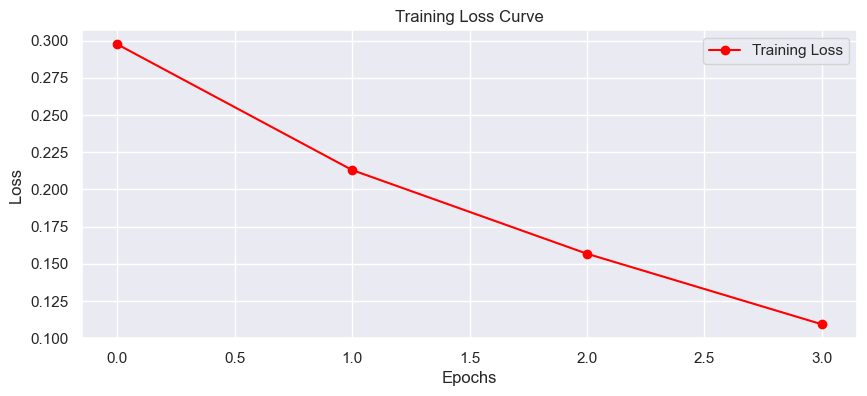

In [79]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (10,4)

plt.plot(loss_values, 'b-o', label='Training Loss', color = 'red') #training loss curve plot
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss ')
plt.legend()
plt.show()

In [80]:
test_input, test_mask = bert_encode(tweets_test,MAX_LEN)


prediction_input = torch.tensor(test_input)
prediction_mask = torch.tensor(test_mask)
prediction_label = torch.tensor(labels_test)

prediction_data = TensorDataset(prediction_input, prediction_mask, prediction_label)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size= 32)

In [81]:
bert_model.eval() # Evaluate Model

predictions, true_labels = [], []  # Tracking variables (predictions and labels for test data)

# Prediction
for batch in prediction_dataloader: # Unpacks the inputs from the dataloader
    
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = bert_model(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)

    logits = outputs[0]

    logits = logits.detach().numpy() # Move logits and labels to CPU
    label_ids = b_labels.numpy()

    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

print('Predicting Test Labels Complete.')

# Save predictions and true labels to a file
np.save('predictions.npy', np.concatenate(predictions, axis=0))
np.save('true_labels.npy', np.concatenate(true_labels, axis=0))

#Test Dataset includes around 2,478 tweets

Predicting Test Labels Complete.


In [82]:
flat_pred = [item for sublist in predictions for item in sublist] # predictions for all batches into a single list of labels
flat_pred = np.argmax(flat_pred, axis=1).flatten()

flat_truelabel = [item for sublist in true_labels for item in sublist]

In [83]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, flat_pred))
#the classification report can fluctuate a little due training process but generally stays the same

              precision    recall  f1-score   support

           0       0.47      0.37      0.42       134
           1       0.94      0.96      0.95      1904
           2       0.91      0.88      0.89       440

    accuracy                           0.91      2478
   macro avg       0.77      0.74      0.75      2478
weighted avg       0.91      0.91      0.91      2478



In [84]:
# Get the classification report
report = classification_report(labels_test, flat_pred, output_dict=True)

# Extract the precision, recall, and f1-score for each class
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]

# Compute the correlation matrix
correlation_matrix = np.corrcoef([precision, recall, f1_score])

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
[[1.         0.99618693 0.99888223]
 [0.99618693 1.         0.99919732]
 [0.99888223 0.99919732 1.        ]]


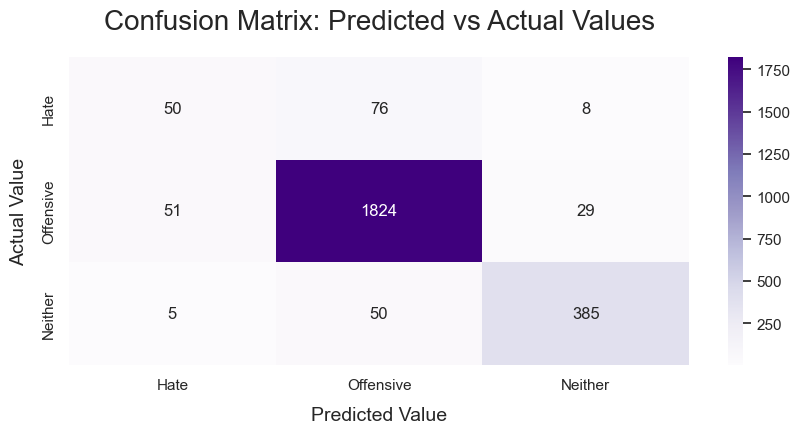

In [85]:
from sklearn.metrics import confusion_matrix

# Define category names
categories = ['Hate', 'Offensive', 'Neither']

# Compute the confusion matrix
conf_matrix = confusion_matrix(flat_truelabel , flat_pred)

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='d', xticklabels=categories, yticklabels=categories)
plt.title("Confusion Matrix: Predicted vs Actual Values", fontdict={'size': 20}, pad=20)
plt.xlabel("Predicted Value", fontdict={'size': 14}, labelpad=10)
plt.ylabel("Actual Value", fontdict={'size': 14}, labelpad=10)
plt.show()

In [87]:
print(labels_test)

print(flat_pred)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [118]:
#Tried to use lime but it kept making my Kernel die

#!pip install lime
#import lime.lime_text

In [119]:
#from lime.lime_text import LimeTextExplainer

In [120]:
#import torch.nn.functional as F

In [161]:
#print(type(tweets))

<class 'numpy.ndarray'>


In [ ]:
#class_names = ['hatespeech','offensive language', 'neither']
#tweets_2 = tweets.tolist()

#def lime_predictor(tweets_2):
 #   outputs = bert_model(**tokenizer(tweets_2, return_tensors="pt", padding=True))
    #tensor_logits = outputs[0]
   # probas = F.softmax(tensor_logits).detach().numpy()
   # return probas

#text = 'cancel that bitch like Nino'
#print(tokenizer(text, return_tensors='pt', padding=True))

#explainer = LimeTextExplainer(class_names=class_names)
#exp = explainer.explain_instance(text, lime_predictor, num_features=20, num_samples=2000)
#exp.show_in_notebook(text= text)